In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


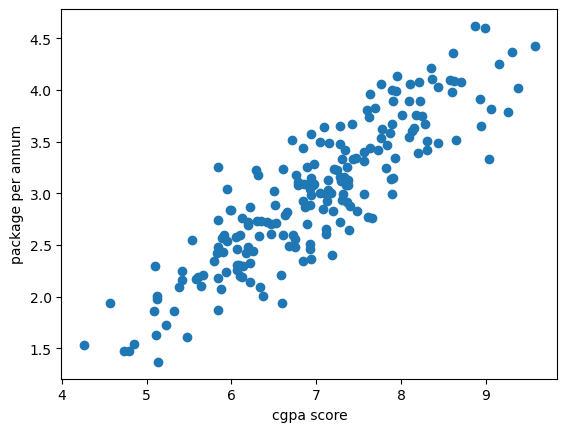

In [4]:
# Check the co-relation between X and Y
plt.scatter(x=df['cgpa'], y=df['package'])
plt.xlabel('cgpa score')
plt.ylabel('package per annum')
plt.show()

### Data is positively co-related

In [9]:
# Check for missing data
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [11]:
# Check if any encoding is needed
df.info()
# Both are float values, so no encoding is needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [14]:
# Outlier treatment, check only for independent variable
df.describe()
# cgpa is from 4.26 to 9.58, so there is no outlier

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [16]:
# As there is only one Independent variable, no need to do any feature scaling.
# data pre-processing is complete, nothing is required

In [20]:
# Split the data into independent and dependent variable
x = df.iloc[:,0:1]
y = df[['package']]

In [21]:
x.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [22]:
y.head()

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57


In [24]:
df.shape

(200, 2)

In [30]:
# split the data in training & test, training is for bulding the model, test is for prediction
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 101)

In [31]:
x_train

,cgpa
85,4.79
183,7.28
127,6.78
53,6.47
100,7.95
...,...
63,9.16
70,5.79
81,6.10
11,6.61


In [32]:
x_test

,cgpa
37,5.90
109,7.77
31,8.10
89,6.42
66,5.11
119,7.39
54,6.86
74,6.85
145,5.84
142,6.93


In [33]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(140, 1) (60, 1) (140, 1) (60, 1)


# Building Linear Regression model

In [42]:
# fit the Linear Regression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [44]:
# Predict the data
y_pred_test = linear_model.predict(x_test)
y_pred_train = linear_model.predict(x_train)

# Evaluate the model

In [38]:
from sklearn.metrics import r2_score

In [45]:
# Min accuracy required 70% to 90% 
print("Training Accuracy: ",r2_score(y_train, y_pred_train))
print("Test Accuracy :", r2_score(y_test, y_pred_test))

Training Accuracy:  0.7868143079009708
Test Accuracy : 0.7409906084479301


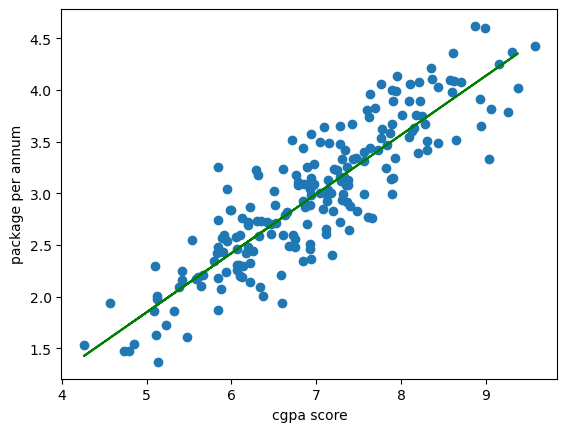

In [52]:
# Add the prediction line in the scatter plot
plt.scatter(x = df['cgpa'], y = df['package'])
plt.plot(x_train, y_pred_train, color = 'green')
plt.xlabel('cgpa score')
plt.ylabel('package per annum')
plt.show()

In [65]:
# Predict the package based on a new dataset of CGPA score
new_cgpa = pd.read_excel('cgpa_score.xlsx')
new_cgpa.shape

(17, 1)

In [66]:
new_package = linear_model.predict(new_cgpa)
new_package.shape

(17, 1)

In [67]:
# combine both new_package and predicted salary
type(new_cgpa)

pandas.core.frame.DataFrame

In [68]:
type(new_package)

numpy.ndarray

In [73]:
new_package_df = pd.DataFrame(new_package, columns= ['new package'])

In [74]:
type(new_package_df)

pandas.core.frame.DataFrame

In [76]:
predicted_package_basis_cgpa = pd.concat([new_cgpa, new_package_df], axis = 1)

In [79]:
predicted_package_basis_cgpa.to_excel('predicted_package_list_1.xlsx')